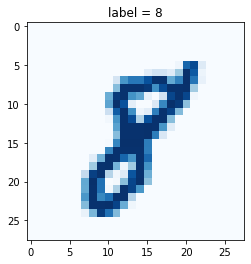

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

class MnistDataset(Dataset):
    def __init__(self, csv_file):
        self.data_df = pd.read_csv(csv_file, header=None)
        pass
    
    def __len__(self):
        return len(self.data_df)
    
    def __getitem__(self, index):
        label = self.data_df.iloc[index,0]
        target = torch.zeros((10))
        target[label] = 1.0
        image_values = torch.FloatTensor(self.data_df.iloc[index,1:].values) / 255.0
        return label, image_values, target
    
    def plot_image(self, index):
        img = self.data_df.iloc[index,1:].values.reshape(28,28)
        plt.title("label = " + str(self.data_df.iloc[index,0]))
        plt.imshow(img, interpolation='none', cmap='Blues')
        pass
    pass

mnist_dataset = MnistDataset('MNIST/mnist_train.csv')
mnist_dataset.plot_image(17)

In [2]:
def generate_random_seed(size):
    random_data = torch.randn(size)
    return random_data

def generate_random_one_hot(size):
    label_tensor = torch.zeros((size))
    random_idx = random.randint(0,size-1)
    label_tensor[random_idx] = 1.0
    return label_tensor

class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784+10, 200),
            nn.LeakyReLU(0.02),
            nn.LayerNorm(200),
            nn.Linear(200, 1),
            nn.Sigmoid()
        )
        self.loss_function = nn.BCELoss()
        self.optimiser = torch.optim.Adam(self.parameters(), lr=0.0001)
        self.counter = 0
        self.progress = []
        pass
    
    def forward(self, image_tensor, label_tensor):
        inputs = torch.cat((image_tensor, label_tensor))
        return self.model(inputs)
    
    def train(self, inputs, label_tensor, targets):
        outputs = self.forward(inputs, label_tensor)
        loss = self.loss_function(outputs, targets)
        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass
        if (self.counter % 10000 == 0):
            print("counter = ", self.counter)
            pass
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()
        pass
    
    def plot_progress(self):
        df = pd.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim = (0), figsize = (16, 8), alpha = 0.1, marker = '.', grid = True, yticks = (0, 0.25, 0.5, 1.0, 5.0))
        pass
    pass

class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100+10, 200),
            nn.LeakyReLU(0.02),
            nn.LayerNorm(200),
            nn.Linear(200, 784),
            nn.Sigmoid()
        )
        self.optimiser = torch.optim.Adam(self.parameters(), lr=0.0001)
        self.counter = 0
        self.progress = []
        pass
    
    def forward(self, seed_tensor, label_tensor):
        inputs = torch.cat((seed_tensor, label_tensor))
        return self.model(inputs)
    
    def train(self, D, inputs, label_tensor, targets):
        g_output = self.forward(inputs, label_tensor)
        d_output = D.forward(g_output, label_tensor)
        loss = D.loss_function(d_output, targets)
        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()
        pass
    
    def plot_images(self, label):
        label_tensor = torch.zeros((10))
        label_tensor[label] = 1.0
        f, axarr = plt.subplots(2,3, figsize=(16,8))
        for i in range(2):
            for j in range(3):
                axarr[i,j].imshow(G.forward(generate_random_seed(100), label_tensor).detach().cpu().numpy().reshape(28,28), interpolation='none', cmap='Blues')
                pass
            pass
        pass

    def plot_progress(self):
        df = pd.DataFrame(self.progress, columns = ['loss'])
        df.plot(ylim = (0), figsize = (16, 8), alpha = 0.1, marker = '.', grid = True, yticks = (0, 0.25, 0.5, 1.0, 5.0))
        pass
    pass

In [3]:
%%time

D = Discriminator()
G = Generator()

epochs = 30

for epoch in range(epochs):
    print ("epoch = ", epoch + 1)
    for label, image_data_tensor, label_tensor in mnist_dataset:
        D.train(image_data_tensor, label_tensor, torch.FloatTensor([1.0]))
        random_label = generate_random_one_hot(10)
        D.train(G.forward(generate_random_seed(100), random_label).detach(), random_label, torch.FloatTensor([0.0]))
        random_label = generate_random_one_hot(10)
        G.train(D, generate_random_seed(100), random_label, torch.FloatTensor([1.0]))
        pass
    pass

epoch =  1
counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
epoch =  2
counter =  130000
counter =  140000
counter =  150000
counter =  160000
counter =  170000
counter =  180000
counter =  190000
counter =  200000
counter =  210000
counter =  220000
counter =  230000
counter =  240000
epoch =  3
counter =  250000
counter =  260000
counter =  270000
counter =  280000
counter =  290000
counter =  300000
counter =  310000
counter =  320000
counter =  330000
counter =  340000
counter =  350000
counter =  360000
epoch =  4
counter =  370000
counter =  380000
counter =  390000
counter =  400000
counter =  410000
counter =  420000
counter =  430000
counter =  440000
counter =  450000
counter =  460000
counter =  470000
counter =  480000
epoch =  5
counter =  490000
counter =  500000
counter =  510000
counter =  520000
counter =  530000


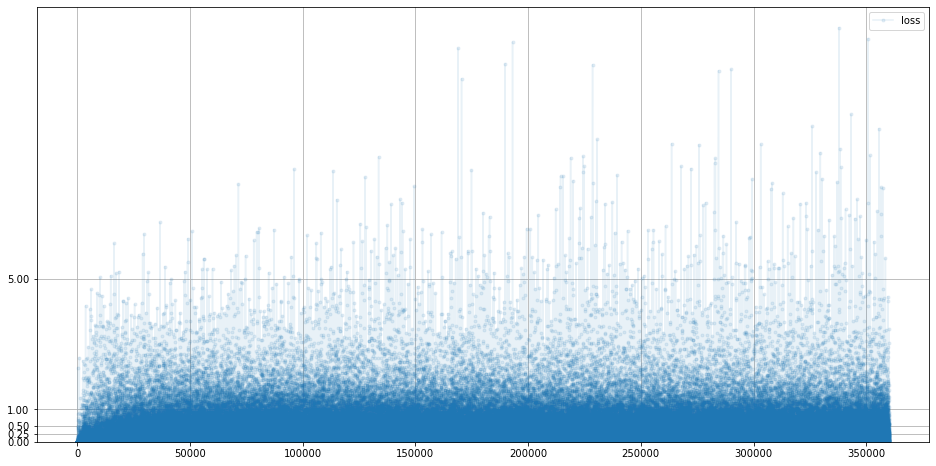

In [4]:
D.plot_progress()

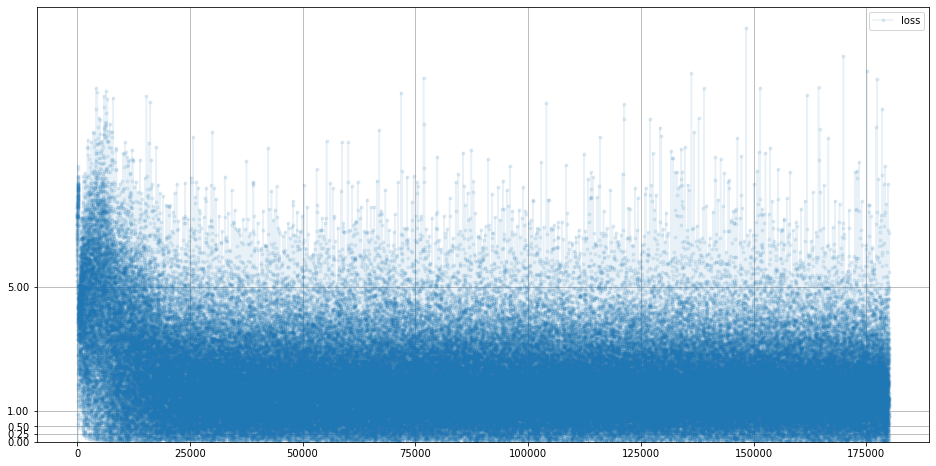

In [5]:
G.plot_progress()

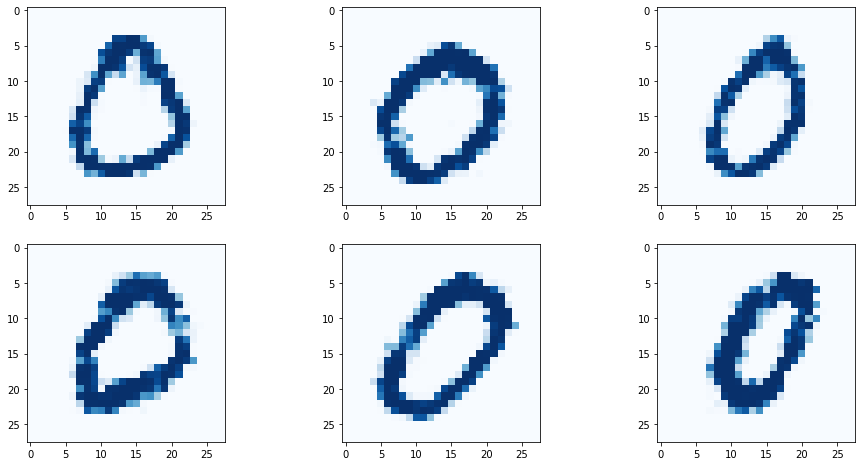

In [6]:
G.plot_images(0)

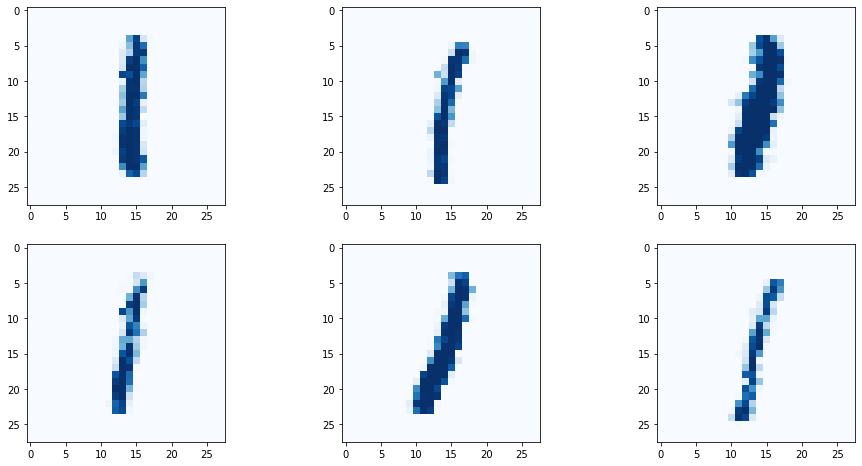

In [7]:
G.plot_images(1)

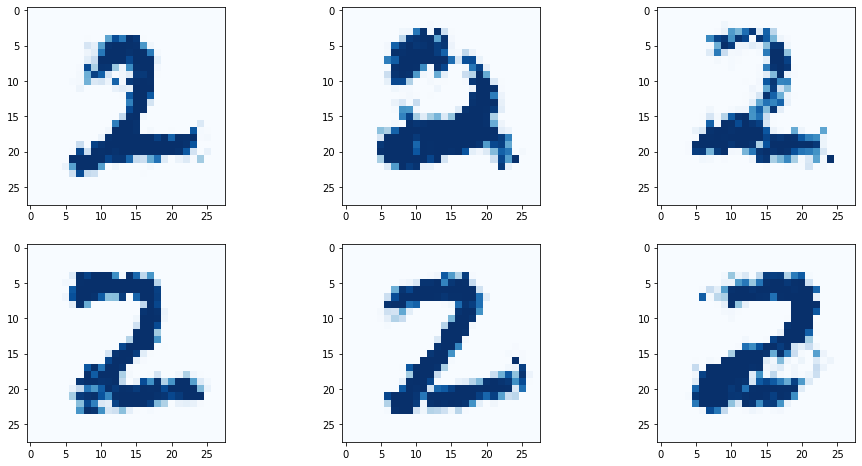

In [8]:
G.plot_images(2)

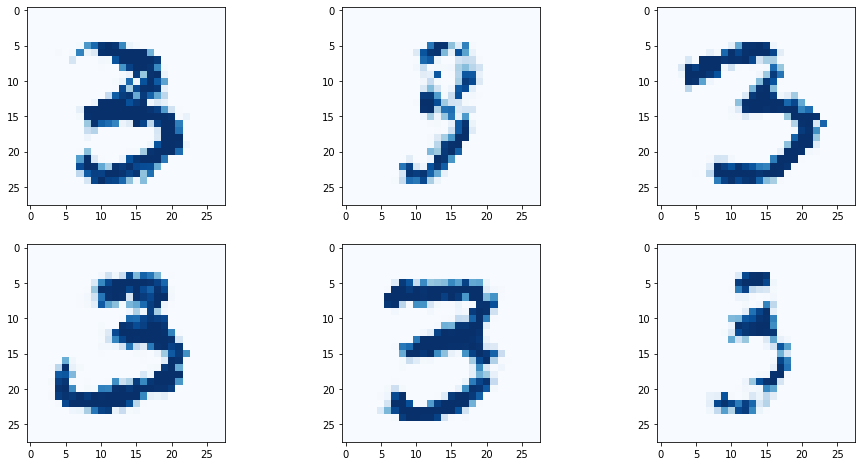

In [9]:
G.plot_images(3)

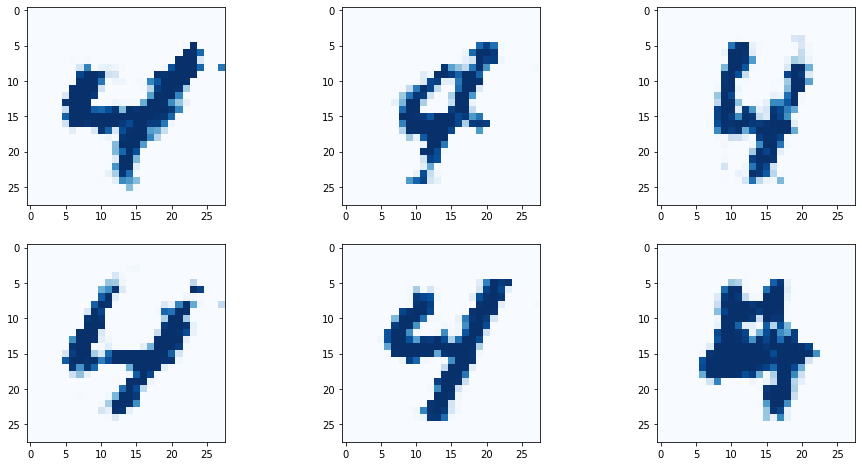

In [10]:
G.plot_images(4)

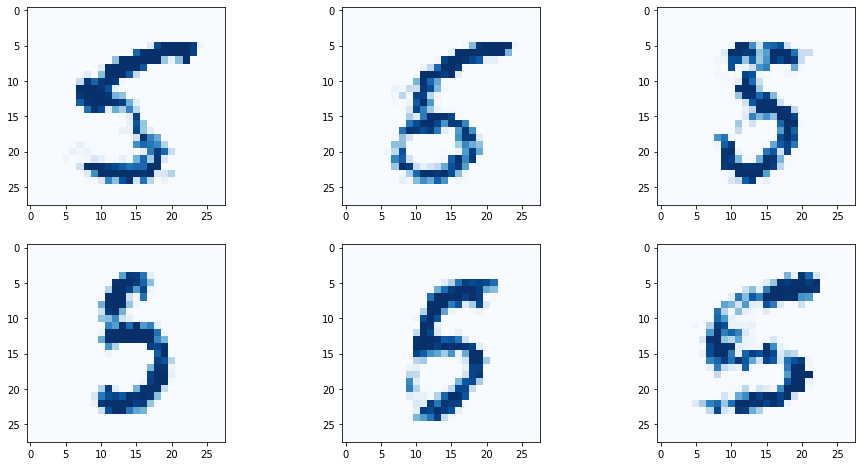

In [11]:
G.plot_images(5)

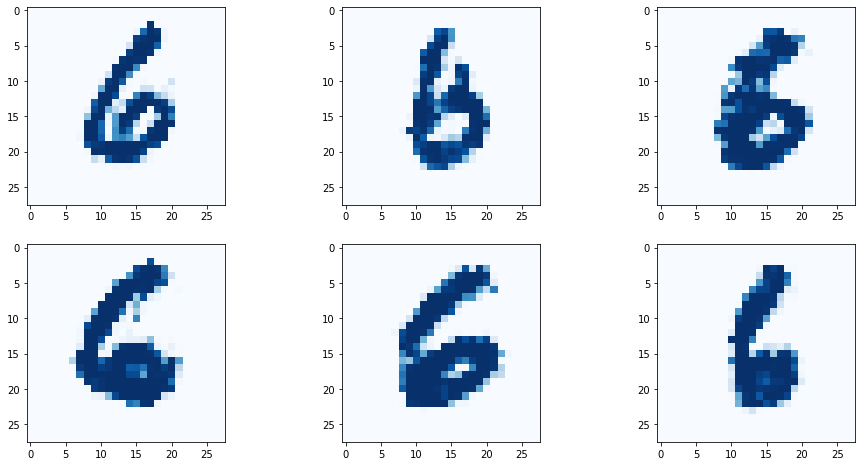

In [12]:
G.plot_images(6)

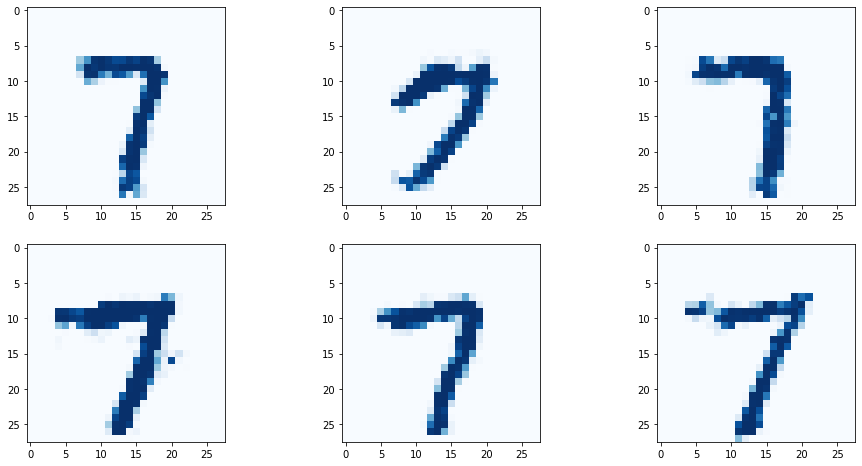

In [13]:
G.plot_images(7)

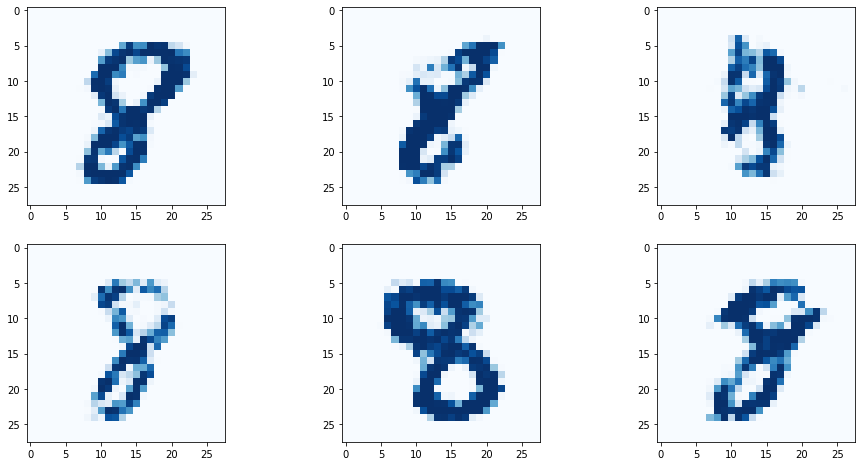

In [14]:
G.plot_images(8)

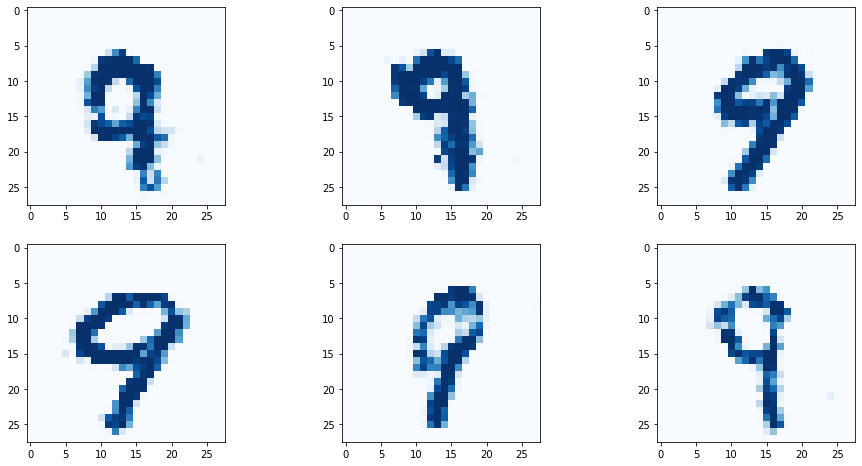

In [15]:
G.plot_images(9)